Preparacion de datos para poder construir un modelo predictivo que permita calcular el revenue por pais en un mes futuro.


In [37]:
import pandas as pd # importar librerias pandas
import numpy as np # importar libreria numpy
import sklearn.metrics # importar libreria sklearn

In [38]:

#Cargo el archivo
file_runrates ='https://raw.githubusercontent.com/jzuluagams/Eafit_AI/main/Dataset_Runrates.xlsx' # Cargar archivo fuente, updated URL to raw content
runrates = pd.read_excel(file_runrates) # Lectura de archivo y cargarlo a la variable runrates
print(runrates.columns)
runrates.head()

Index(['Country', 'Service Line', 'Product Line', 'Business ID', 'Year',
       'Month', 'Sales'],
      dtype='object')


,Country,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jan,755
1,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Mar,1465
2,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Apr,781
3,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - May,918
4,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jul,978


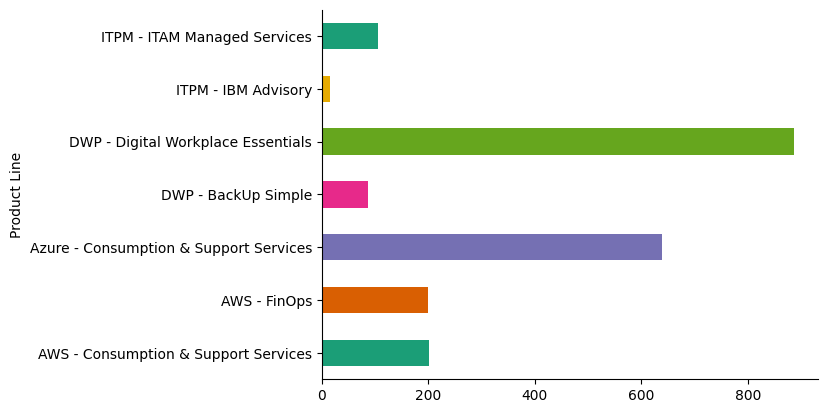

In [39]:
# @title Product Line

from matplotlib import pyplot as plt
import seaborn as sns
runrates.groupby('Product Line').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
# Calculando mediana, minimo, maximo
mean_sales = runrates['Sales'].mean()
min_sales = runrates['Sales'].min()
max_sales = runrates['Sales'].max()
print(mean_sales)
print(min_sales)
print(max_sales)

5145.966292134832
-33910
294006


In [41]:
runrates['Country_Code'] = runrates['Country'].str[:5]  # Extraer 5 caracteres correspondientes al codigo del Pais
runrates['Country_Name'] = runrates['Country'].str[8:]  # Dejar desde el caracter 8 en adelante el nombre del pais

print(runrates[['Country_Code', 'Country_Name']].head())

  Country_Code Country_Name
0        3-032    Argentina
1        3-032    Argentina
2        3-032    Argentina
3        3-032    Argentina
4        3-032    Argentina


In [42]:
runrates.head()

,Country,Service Line,Product Line,Business ID,Year,Month,Sales,Country_Code,Country_Name
0,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jan,755,3-032,Argentina
1,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Mar,1465,3-032,Argentina
2,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Apr,781,3-032,Argentina
3,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - May,918,3-032,Argentina
4,3-032 - Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,2023 - Jul,978,3-032,Argentina


In [43]:
# Borrar la Columna Original 'Country'
runrates = runrates.drop('Country', axis=1)

In [44]:

# Reordenar Columnas, 'Country_Code' y 'Country_Name' como Columnas iniciales
new_column_order = ['Country_Code', 'Country_Name'] + [col for col in runrates.columns if col not in ['Country_Code', 'Country_Name']]
runrates = runrates[new_column_order]

print(runrates.columns)

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


In [45]:
# Modificar Columna Month

runrates['Extract_Year'] = runrates['Month'].str[:6]  # Extraer 6 caracteres correspondientes al codigo del Pais
runrates['Month'] = runrates['Month'].str[7:]  # Dejar desde el caracter 7 en adelante el nombre del mes

print(runrates[['Extract_Year', 'Month']].head())

  Extract_Year Month
0       2023 -   Jan
1       2023 -   Mar
2       2023 -   Apr
3       2023 -   May
4       2023 -   Jul


In [50]:
runrates = runrates.drop('Extract_Year', axis=1)


KeyError: "['Extract_Year'] not found in axis"

In [52]:
print(runrates.columns)
runrates.head()

Index(['Country_Code', 'Country_Name', 'Service Line', 'Product Line',
       'Business ID', 'Year', 'Month', 'Sales'],
      dtype='object')


,Country_Code,Country_Name,Service Line,Product Line,Business ID,Year,Month,Sales
0,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Jan,755
1,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Mar,1465
2,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Apr,781
3,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,May,918
4,3-032,Argentina,Cloud Services AWS,AWS - Consumption & Support Services,TS002A2 - Simple for AWS,2023,Jul,978
